In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

In [2]:
# ----------------------
# 1. Load Data
# ----------------------
DEFAULT_DATA_DIR = r"C:\Users\manoe.MC_ASUS\Documents\IRON HACK BOOTCAMP\DAFT_Feb 2025\labs\Week 5\5.1 lab-eda-univariate"

def load_data(file_name):
    """Load a dataset from the default directory and return it as a DataFrame."""
    file_path = os.path.join(DEFAULT_DATA_DIR, file_name)
    return pd.read_csv(file_path)


In [3]:
df_amz_uk = load_data("amz_uk_price_prediction_dataset.csv")
df_amz_uk.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [26]:
ct_category_bestseller = pd.crosstab(df_amz_uk['category'], df_amz_uk['isBestSeller'], normalize='index')

In [28]:
ct_sorted= ct_category_bestseller.sort_values(by=True, ascending=False)
ct_sorted.head(10)

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
"Billiard, Snooker & Pool",0.967871,0.032129
Pet Supplies,0.969800,0.030200
Home Brewing & Wine Making,0.971545,0.028455
Wind Instruments,0.972000,0.028000


In [48]:
overall_avg = df_amz_uk['isBestSeller'].mean()
print ("Overall avg is:", overall_avg)

Overall avg is: 0.003265605440384081


In [41]:
ct_higher = ct_category_bestseller[ct_category_bestseller[True] > overall_avg]
ct_higher.head(10)

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
Abrasive & Finishing Products,0.980000,0.020000
Adapters,0.988189,0.011811
Agricultural Equipment & Supplies,0.987222,0.012778
Alexa Built-In Devices,0.990654,0.009346
Art & Craft Supplies,0.980620,0.019380
Arts & Crafts,0.975914,0.024086
Baby,0.977342,0.022658
Bakeware,0.974895,0.025105


In [47]:
ct_sorted = ct_higher.sort_values(by=True, ascending=False)
ct_sorted.head(10)

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
"Billiard, Snooker & Pool",0.967871,0.032129
Pet Supplies,0.969800,0.030200
Home Brewing & Wine Making,0.971545,0.028455
Wind Instruments,0.972000,0.028000


In [52]:
ct_above_avg = ct_sorted[ct_sorted[True] > overall_avg]
ct_above_avg.head(200)

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
Cricket Shoes,0.996564,0.003436
"Pens, Pencils & Writing Supplies",0.996616,0.003384
Wearable Technology,0.996631,0.003369


In [54]:
ct_above_avg_reset = ct_above_avg.reset_index()
display(ct_above_avg_reset)



isBestSeller,category,False,True
0,Grocery,0.941865,0.058135
1,Smart Home Security & Lighting,0.942308,0.057692
2,Health & Personal Care,0.942314,0.057686
3,Mobile Phone Accessories,0.957529,0.042471
4,Power & Hand Tools,0.964661,0.035339
5,"Billiard, Snooker & Pool",0.967871,0.032129
6,Pet Supplies,0.969800,0.030200
7,Home Brewing & Wine Making,0.971545,0.028455
8,Wind Instruments,0.972000,0.028000
9,Mirrors,0.972000,0.028000


Answer: 145 categories have a higher-than-average percentage of best seller products.

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [56]:
import scipy.stats as stats

ontingency_table = pd.crosstab(df_amz_uk['category'], df_amz_uk['isBestSeller'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square statistic: 36540.20
Degrees of freedom: 295
P-value: 0.0000


In [57]:
import numpy as np

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v:.4f}")


Cramér's V: 0.1223


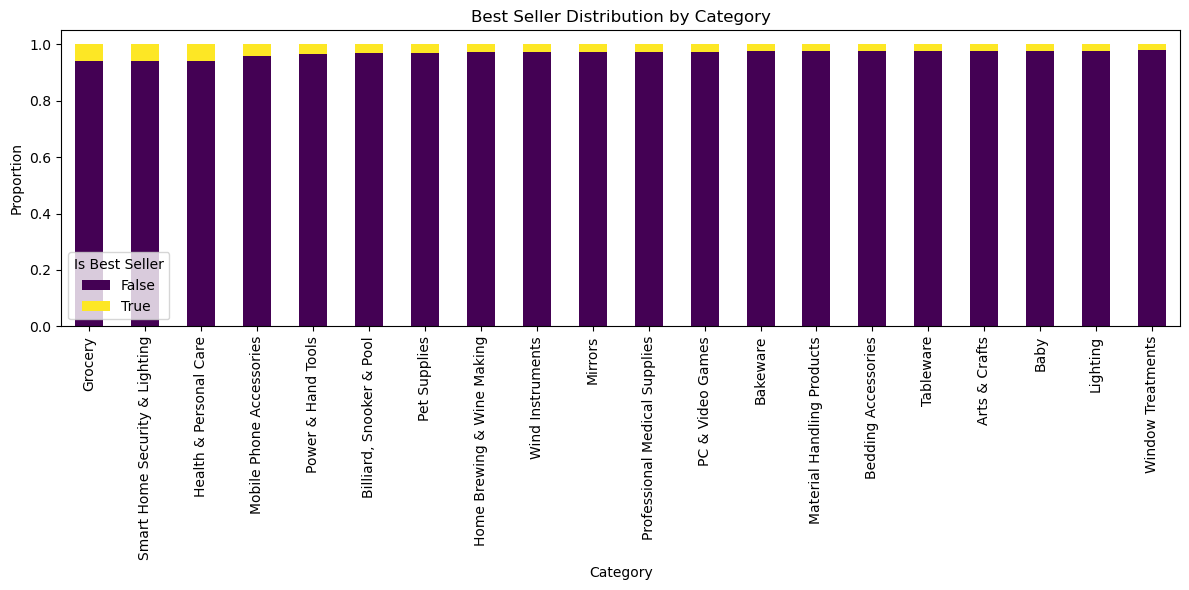

In [58]:
import matplotlib.pyplot as plt

category_bestseller_counts = pd.crosstab(df_amz_uk['category'], df_amz_uk['isBestSeller'])
category_bestseller_counts = category_bestseller_counts.div(category_bestseller_counts.sum(axis=1), axis=0)

category_bestseller_counts.sort_values(True, ascending=False).head(20).plot(
    kind='bar', stacked=True, figsize=(12,6), colormap='viridis'
)
plt.title('Best Seller Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.legend(title='Is Best Seller')
plt.tight_layout()
plt.show()


In [59]:
Q1 = df_amz_uk['price'].quantile(0.25)
Q3 = df_amz_uk['price'].quantile(0.75)
IQR = Q3 - Q1

filtered_df = df_amz_uk[(df_amz_uk['price'] >= Q1 - 1.5 * IQR) & (df_amz_uk['price'] <= Q3 + 1.5 * IQR)]


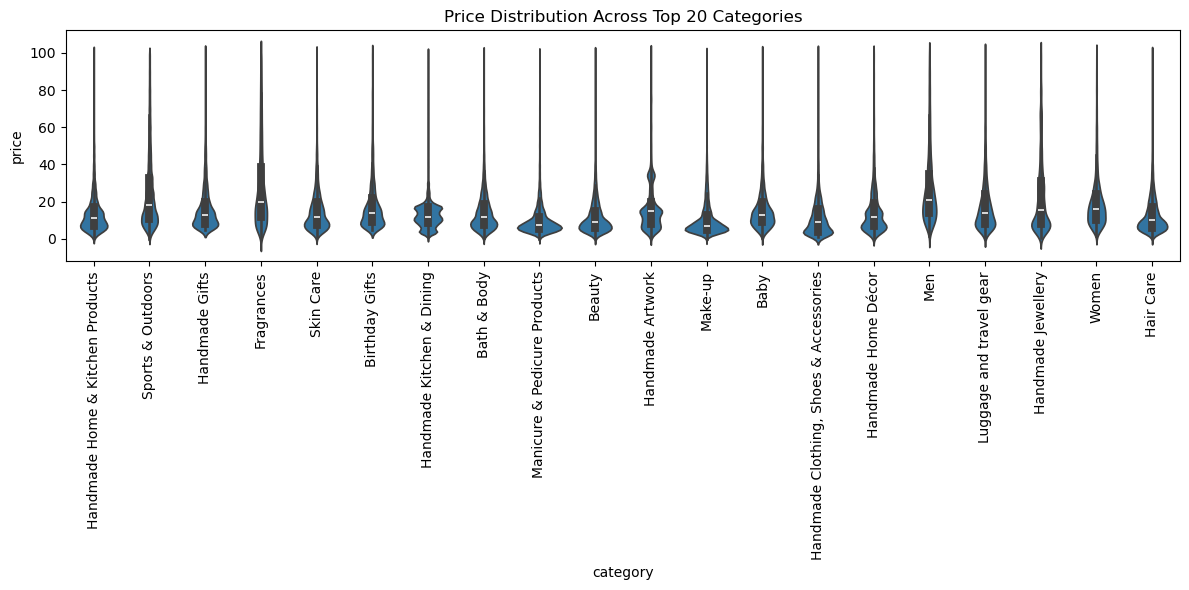

In [60]:
import seaborn as sns

top_20_categories = filtered_df['category'].value_counts().head(20).index

plt.figure(figsize=(12,6))
sns.violinplot(x='category', y='price', data=filtered_df[filtered_df['category'].isin(top_20_categories)])
plt.xticks(rotation=90)
plt.title('Price Distribution Across Top 20 Categories')
plt.tight_layout()
plt.show()


In [61]:
median_prices = df_amz_uk.groupby('category')['price'].median().sort_values(ascending=False)
print("Category with highest median price:", median_prices.index[0])


Category with highest median price: Laptops


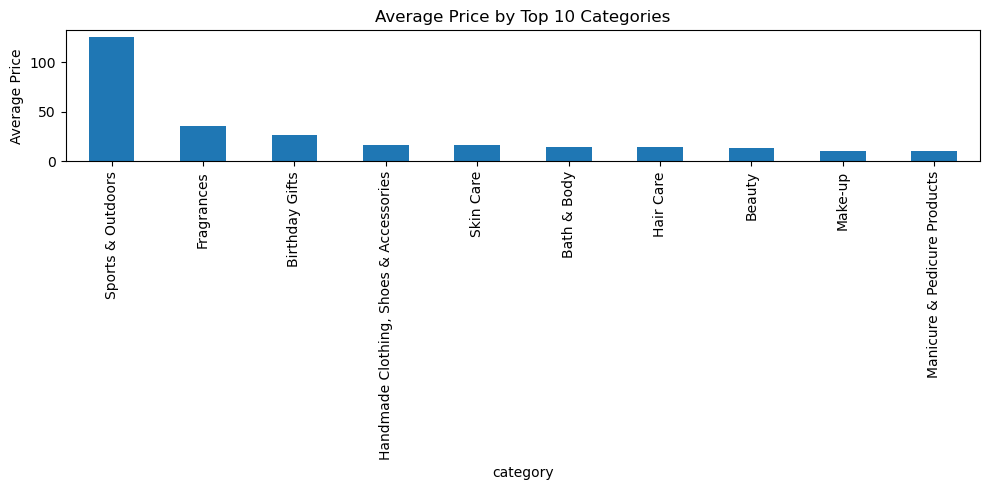

In [62]:
top_10 = df_amz_uk['category'].value_counts().head(10).index
avg_price_top_10 = df_amz_uk[df_amz_uk['category'].isin(top_10)].groupby('category')['price'].mean().sort_values(ascending=False)

avg_price_top_10.plot(kind='bar', figsize=(10,5), title='Average Price by Top 10 Categories')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


In [63]:
avg_price_all = df_amz_uk.groupby('category')['price'].mean().sort_values(ascending=False)
print("Category with highest average price:", avg_price_all.index[0])


Category with highest average price: Laptops


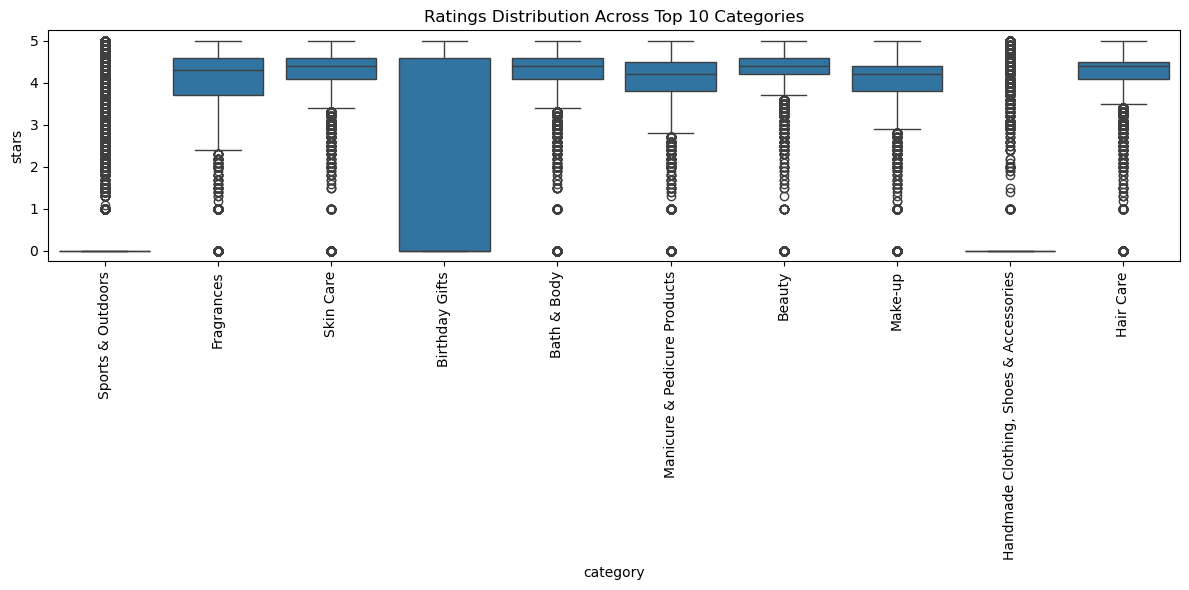

In [64]:
top_10_rating_cats = df_amz_uk['category'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='stars', data=df_amz_uk[df_amz_uk['category'].isin(top_10_rating_cats)])
plt.xticks(rotation=90)
plt.title('Ratings Distribution Across Top 10 Categories')
plt.tight_layout()
plt.show()


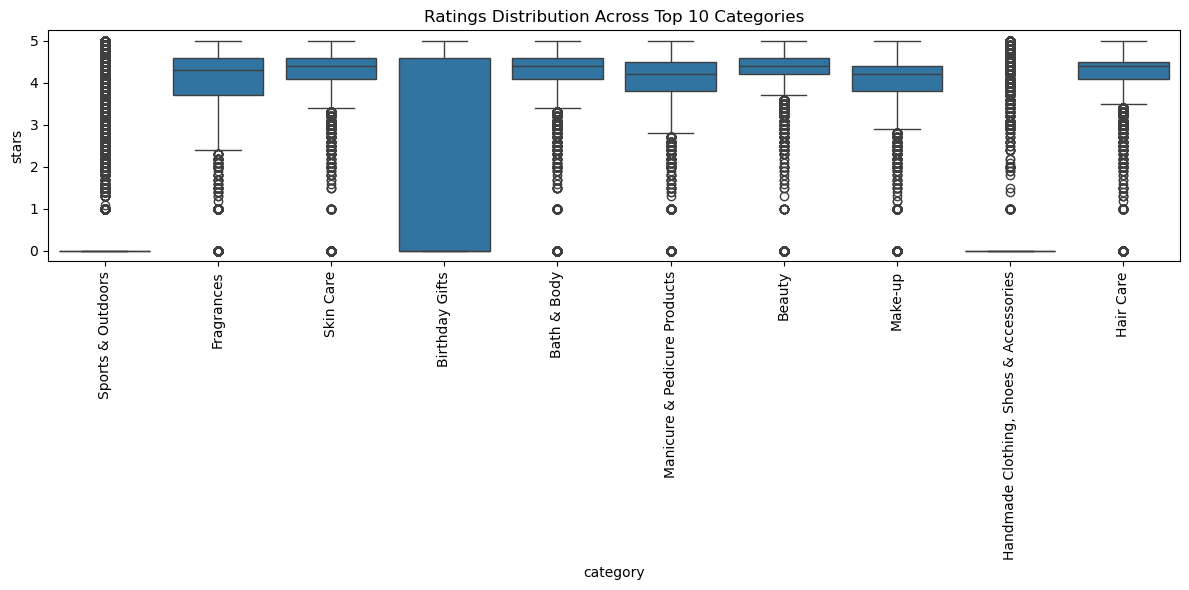

In [65]:
top_10_rating_cats = df_amz_uk['category'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='stars', data=df_amz_uk[df_amz_uk['category'].isin(top_10_rating_cats)])
plt.xticks(rotation=90)
plt.title('Ratings Distribution Across Top 10 Categories')
plt.tight_layout()
plt.show()


In [66]:
median_ratings = df_amz_uk.groupby('category')['stars'].median().sort_values(ascending=False)
print("Category with highest median rating:", median_ratings.index[0])


Category with highest median rating: Computer Memory


In [67]:
correlation = df_amz_uk['price'].corr(df_amz_uk['stars'])
print(f"Correlation between price and stars: {correlation:.4f}")


Correlation between price and stars: -0.1249


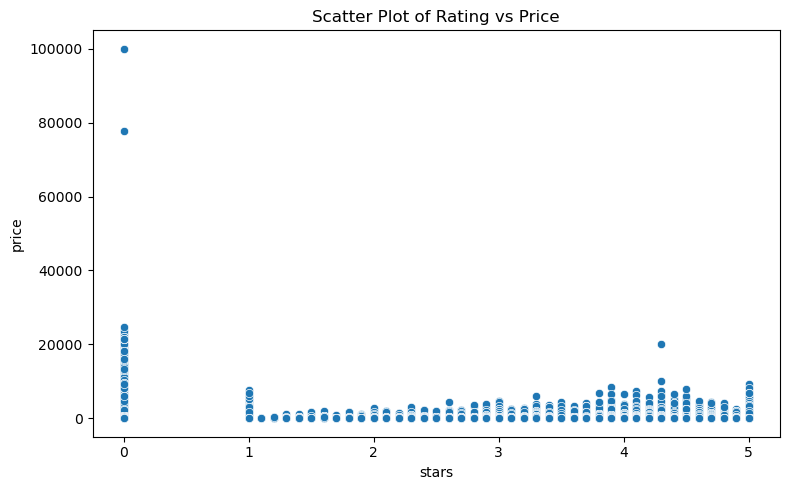

In [68]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='stars', y='price', data=df_amz_uk)
plt.title('Scatter Plot of Rating vs Price')
plt.tight_layout()
plt.show()


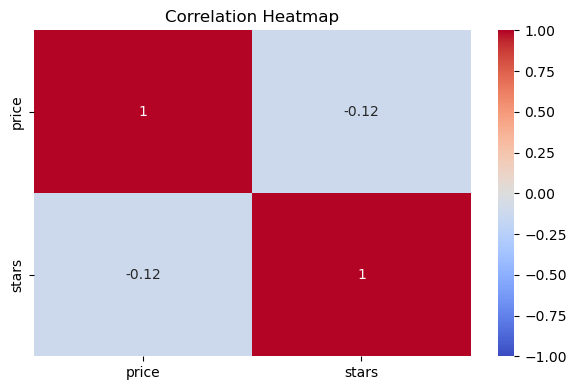

In [69]:
plt.figure(figsize=(6,4))
sns.heatmap(df_amz_uk[['price', 'stars']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


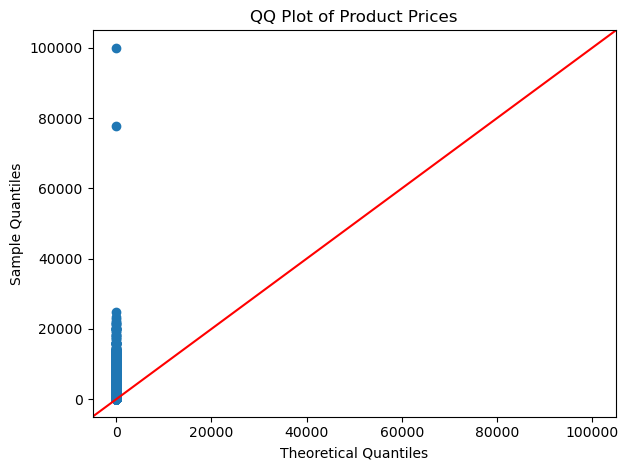

In [70]:
import statsmodels.api as sm

sm.qqplot(df_amz_uk['price'], line='45')
plt.title('QQ Plot of Product Prices')
plt.tight_layout()
plt.show()
